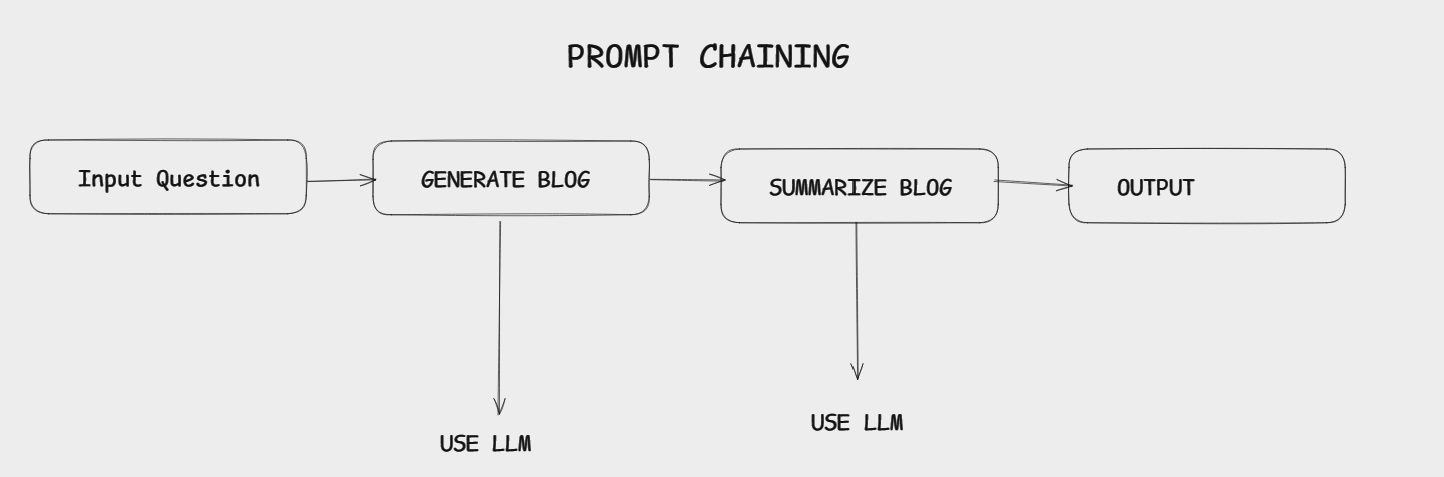


In [1]:
from langchain_groq import ChatGroq
from langgraph.graph import StateGraph, START, END
from dotenv import load_dotenv
from typing import TypedDict

In [2]:
load_dotenv()

True

In [3]:
model = ChatGroq(model="llama-3.1-8b-instant")

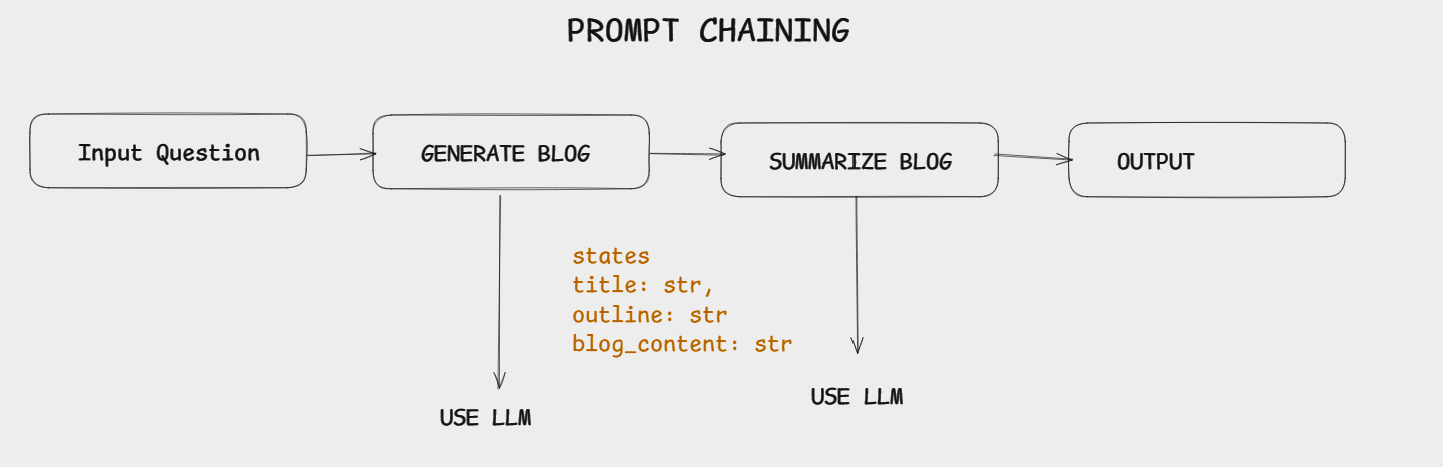


In [ ]:
class BlogState(TypedDict):
    title: str
    outline: str
    blog_content: str

In [5]:
graph = StateGraph(BlogState)

In [8]:
def create_outline(state: BlogState) -> BlogState:
    # fetch title
    title = state["title"]
    # generate outline
    prompt = f"Generate an Outline for a Blog on the topic - {title}"
    # get outline
    outline = model.invoke(prompt).content

    # update state
    state["outline"] = outline

    return state

In [10]:
def create_blog(state: BlogState) -> BlogState:
    # fetch title
    title = state["title"]
    # fetch outline
    outline = state["outline"]
    # generate blog
    prompt = f"Generate a Blog {title} with the help of following outline\n{outline}"
    # get blog
    blog = model.invoke(prompt).content

    # update state
    state["blog_content"] = blog

    return state

In [11]:
# Add nodes
graph.add_node("get_outline", create_outline)
graph.add_node("get_blog", create_blog)

In [12]:
# Add Edges
graph.add_edge(START, "get_outline")
graph.add_edge("get_outline", "get_blog")
graph.add_edge("get_blog", END)

In [14]:
workflow = graph.compile()

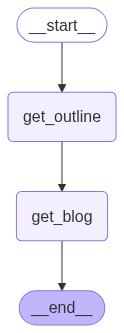

In [15]:
workflow

In [21]:
initial_state = {"title": "AI the Human Assistant"}

final_state = workflow.invoke(initial_state)

In [22]:
final_state

{'title': 'AI the Human Assistant',
 'outline': '**Title:** "AI: The Human Assistant - Revolutionizing Productivity and Efficiency"\n\n**I. Introduction**\n\n- Brief overview of AI and its growing presence in our daily lives\n- Importance of AI in enhancing human productivity and efficiency\n- Thesis statement: AI is emerging as a powerful human assistant, transforming the way we work and interact with technology.\n\n**II. What is AI and How Does it Assist Humans?**\n\n- Definition of AI and its types (Narrow AI, General AI, Super AI)\n- Explanation of AI\'s capabilities, including:\n  * Predictive analytics\n  * Machine learning\n  * Natural Language Processing (NLP)\n  * Automation\n- Examples of AI-assisted tasks, such as email management, scheduling appointments, and data analysis.\n\n**III. Benefits of AI as a Human Assistant**\n\n- Increased productivity and efficiency\n- Enhanced accuracy and reduced errors\n- Improved decision-making through data-driven insights\n- Automation o

In [23]:
final_state["blog_content"]

"**AI: The Human Assistant - Revolutionizing Productivity and Efficiency**\n\nIn today's fast-paced world, technology has become an integral part of our daily lives. Artificial Intelligence (AI) is no exception, as it continues to make waves in various industries and aspects of our lives. From virtual assistants like Siri and Alexa to self-driving cars and intelligent personal assistants, AI has already started to revolutionize the way we work and interact with technology. In this blog post, we'll delve into the world of AI and its potential to emerge as a powerful human assistant, transforming productivity and efficiency in the process.\n\n**I. Introduction**\n\nArtificial Intelligence has been around for decades, but its growing presence in our daily lives has been quite remarkable. From smart homes to intelligent personal assistants, AI has become an indispensable tool for enhancing human productivity and efficiency. The importance of AI cannot be overstated, as it has the potential

## Short Home Work


In [ ]:
class BlogState(TypedDict):
    title: str
    outline: str
    blog_content: str
    score: int

In [25]:
graph = StateGraph(BlogState)

In [26]:
def create_outline(state: BlogState) -> BlogState:
    # fetch title
    title = state["title"]
    # generate outline
    prompt = f"Generate an Outline for a Blog on the topic - {title}"
    # get outline
    outline = model.invoke(prompt).content

    # update state
    state["outline"] = outline

    return state

In [27]:
def create_blog(state: BlogState) -> BlogState:
    # fetch title
    title = state["title"]
    # fetch outline
    outline = state["outline"]
    # generate blog
    prompt = f"Generate a Blog {title} with the help of following outline\n{outline}"
    # get blog
    blog = model.invoke(prompt).content

    # update state
    state["blog_content"] = blog

    return state

In [28]:
def create_score(state: BlogState) -> BlogState:
    # fetch title
    title = state["title"]
    # fetch outline
    outline = state["outline"]
    # fetch blog
    blog = state["blog_content"]
    # generate blog
    prompt = f"Generate a Score between 1 to 10 for my blog with title - {title} \nOutline-{outline}\n\nBlog-{blog}"
    # get score
    score = model.invoke(prompt).content

    # update state
    state["score"] = score

    return state

In [29]:
# Add nodes
graph.add_node("get_outline", create_outline)
graph.add_node("get_blog", create_blog)
graph.add_node("get_score", create_score)

In [30]:
# Add Edges
graph.add_edge(START, "get_outline")
graph.add_edge("get_outline", "get_blog")
graph.add_edge("get_blog", "get_score")
graph.add_edge("get_score", END)

In [31]:
workflow = graph.compile()

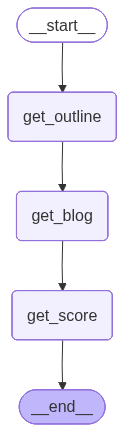

In [32]:
workflow

In [33]:
initial_state = {"title": "5 Habits of Successfull People"}

final_state = workflow.invoke(initial_state)

In [34]:
final_state

{'title': '5 Habits of Successfull People',
 'outline': 'Here\'s an outline for a blog on the topic "5 Habits of Successful People":\n\n**I. Introduction**\n\n- Briefly discuss the concept of success and what it means to be successful\n- Mention the purpose of the blog post: to explore the habits of successful people\n- Thesis statement: Developing these 5 habits can help anyone achieve their goals and become more successful.\n\n**II. Habit 1: Setting Clear Goals and Priorities**\n\n- Explain the importance of setting clear goals and priorities\n- Discuss how successful people set SMART (Specific, Measurable, Achievable, Relevant, Time-bound) goals\n- Provide examples of successful people who have achieved their goals through clear planning\n- Tips for readers to implement this habit in their own lives\n\n**III. Habit 2: Developing a Morning Routine**\n\n- Discuss the benefits of starting the day with a consistent routine\n- Share examples of successful people\'s morning routines (e.g.

In [ ]:
final_state["score"]

'**Score: 8.5/10**\n\n**Strengths:**\n\n1. **Comprehensive outline**: The provided outline covers all the essential aspects of the topic, making it a comprehensive guide for readers.\n2. **Clear structure**: The blog post follows a logical structure, making it easy to follow and understand.\n3. **Useful tips and examples**: The post provides actionable tips and examples from successful people, making it engaging and informative.\n4. **Well-organized**: The post is well-organized, with each section flowing smoothly into the next.\n\n**Weaknesses:**\n\n1. **Lack of depth**: While the post provides a good overview of the 5 habits, it lacks depth and detail in some areas.\n2. **Some sections feel repetitive**: Some sections, such as Habit 1 and Habit 5, feel repetitive and could be condensed.\n3. **No call-to-action**: The post ends abruptly without a clear call-to-action, leaving readers without a sense of direction.\n4. **Some sentences could be rephrased**: Some sentences feel a bit gen